In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def cos_func(x):
    f_1 = 50
    f_2 = 150
    f_3 = 450
    w_1 = 2 * np.pi * f_1
    w_2 = 2 * np.pi * f_2
    w_3 = 2 * np.pi * f_3
    return np.cos(w_1 * x) + np.cos(w_2 * x) + np.cos(w_3 * x)

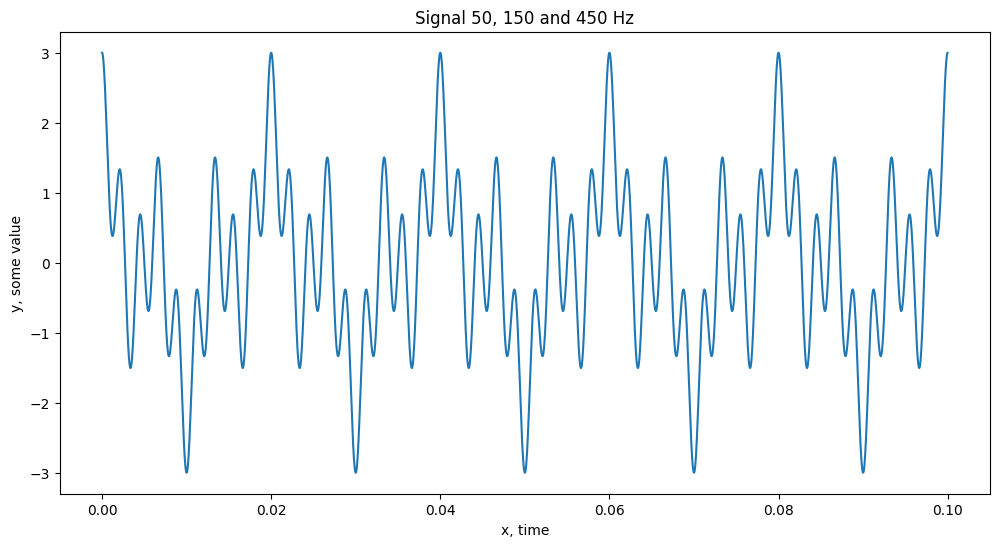

In [3]:
cos_args = np.arange(0, 0.1, 1 / 50000)
y_cos = cos_func(cos_args)

plt.figure(figsize=(12, 6))
plt.plot(cos_args, y_cos)
plt.title("Signal 50, 150 and 450 Hz")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.show()

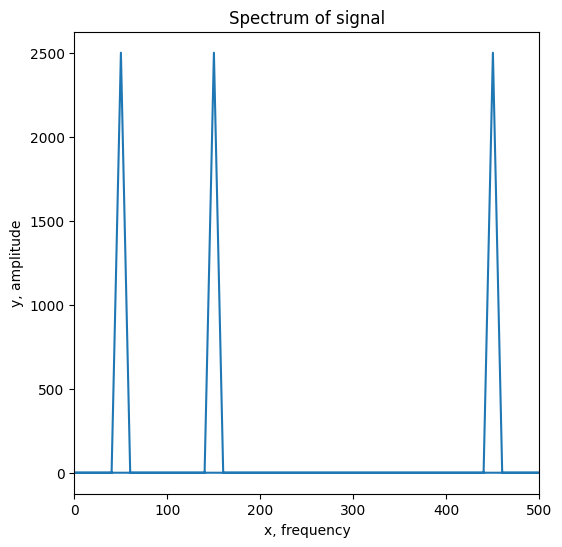

In [4]:
x_cos_fft = np.fft.fftfreq(len(cos_args), 0.1 / len(cos_args))
y_cos_fft = np.fft.fft(y_cos)

plt.figure(figsize=(6, 6))
plt.plot(x_cos_fft, np.abs(y_cos_fft))
plt.xlim([0, 500])
plt.title("Spectrum of signal")
plt.xlabel("x, frequency")
plt.ylabel("y, amplitude") 
plt.show()

In [5]:
def butter_filter(w):
    return 1 / (w ** 2 + 1j * np.sqrt(2) * w + 1)

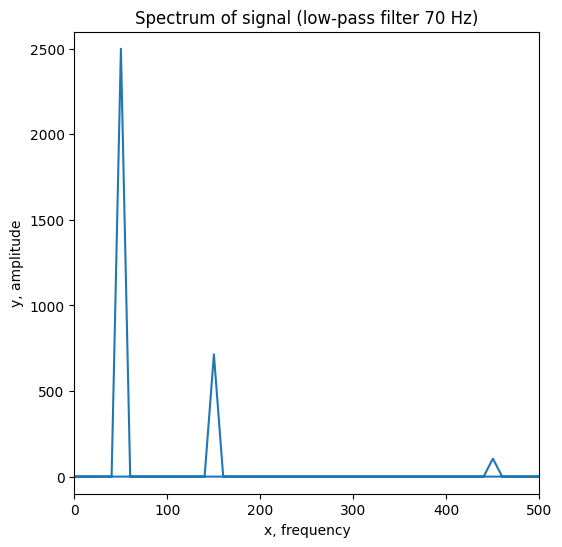

In [27]:
low_filtered_y_cos_fft_base = butter_filter(x_cos_fft / 70)
low_filtered_y_cos_fft = low_filtered_y_cos_fft_base * y_cos_fft
low_filtered_y_cos_fft /= max(low_filtered_y_cos_fft) / max(y_cos_fft)

plt.figure(figsize=(6, 6))
plt.xlim([0, 500])
plt.ylim([-100, 2600])
plt.plot(x_cos_fft, np.abs(low_filtered_y_cos_fft))
plt.title("Spectrum of signal (low-pass filter 70 Hz)")
plt.xlabel("x, frequency")
plt.ylabel("y, amplitude") 
plt.show()

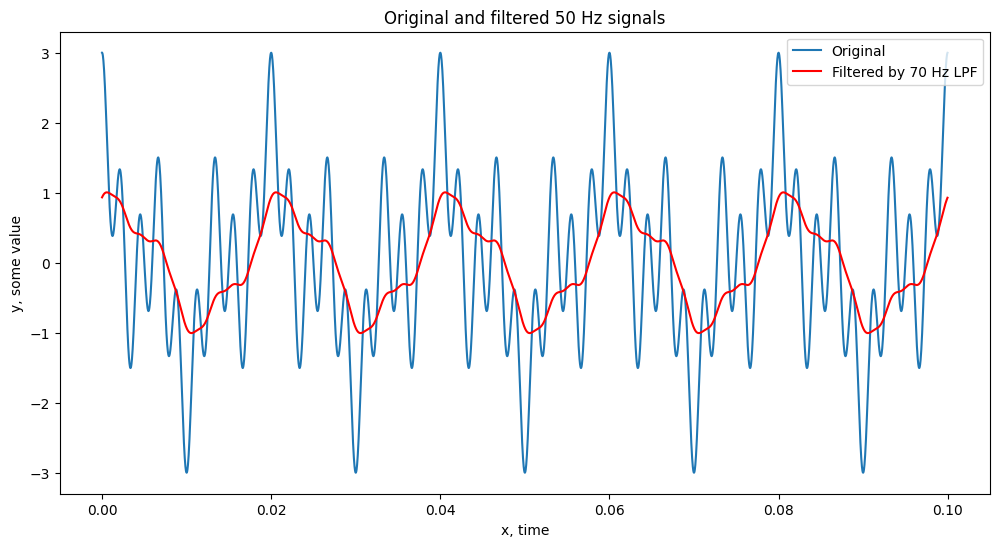

In [43]:
y_cos_from_low = np.fft.ifft(low_filtered_y_cos_fft)

plt.figure(figsize=(12, 6))
plt.plot(cos_args, y_cos)
plt.plot(cos_args, y_cos_from_low, 'red')
plt.title("Original and filtered 50 Hz signals")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.legend(['Original', 'Filtered by 70 Hz LPF'])
plt.show()

C:\Users\ZhukZzz\AppData\Local\Temp\ipykernel_11584\1168739424.py:1: RuntimeWarning: divide by zero encountered in divide
  high_filtered_y_cos_fft_base = butter_filter(300 / x_cos_fft)
C:\Users\ZhukZzz\AppData\Local\Temp\ipykernel_11584\586530782.py:2: RuntimeWarning: invalid value encountered in multiply
  return 1 / (w ** 2 + 1j * np.sqrt(2) * w + 1)
C:\Users\ZhukZzz\AppData\Local\Temp\ipykernel_11584\586530782.py:2: RuntimeWarning: invalid value encountered in divide
  return 1 / (w ** 2 + 1j * np.sqrt(2) * w + 1)


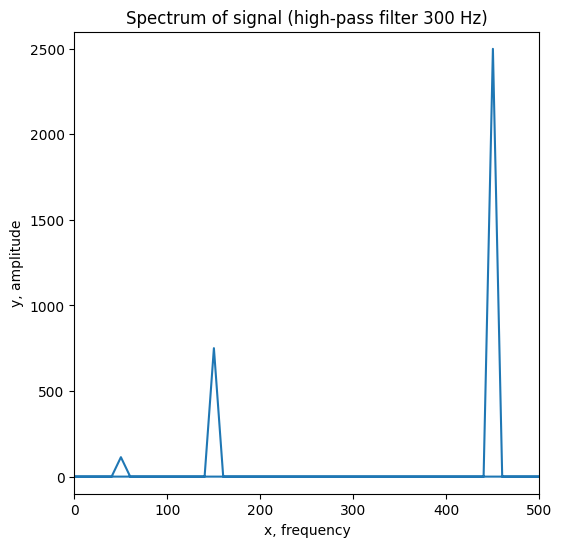

In [28]:
high_filtered_y_cos_fft_base = butter_filter(300 / x_cos_fft)
high_filtered_y_cos_fft_base[0] = 0
high_filtered_y_cos_fft = high_filtered_y_cos_fft_base * y_cos_fft
high_filtered_y_cos_fft /= max(high_filtered_y_cos_fft) / max(y_cos_fft)

plt.figure(figsize=(6, 6))
plt.xlim([0, 500])
plt.ylim([-100, 2600])
plt.plot(x_cos_fft, np.abs(high_filtered_y_cos_fft))
plt.title("Spectrum of signal (high-pass filter 300 Hz)")
plt.xlabel("x, frequency")
plt.ylabel("y, amplitude") 
plt.show()

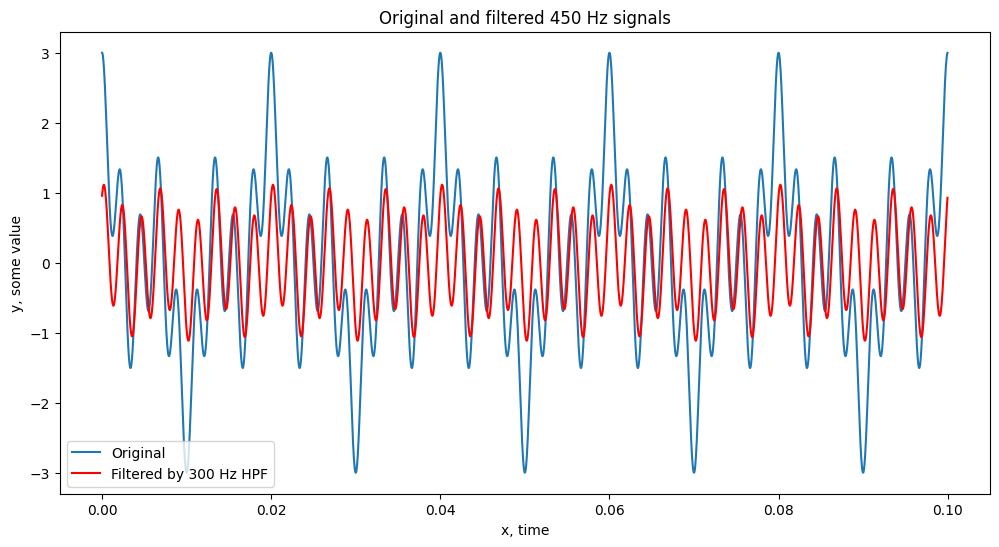

In [44]:
y_cos_from_high = np.fft.ifft(high_filtered_y_cos_fft)

plt.figure(figsize=(12, 6))
plt.plot(cos_args, y_cos)
plt.plot(cos_args, y_cos_from_high, 'red')
plt.title("Original and filtered 450 Hz signals")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.legend(['Original', 'Filtered by 300 Hz HPF'])
plt.show()

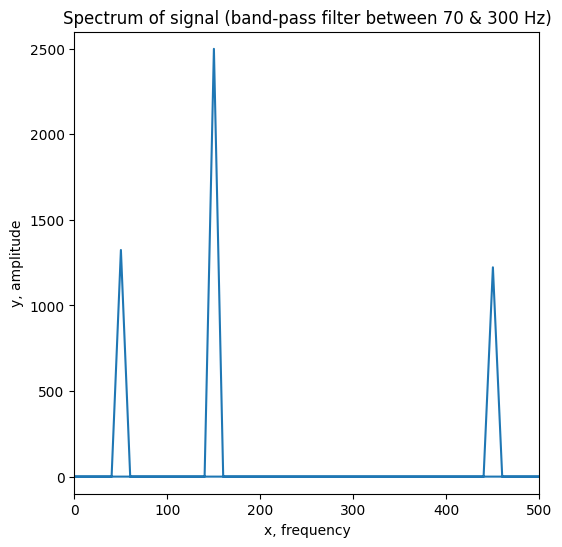

In [31]:
band_pass_filtered_y_cos_fft_base = low_filtered_y_cos_fft_base * high_filtered_y_cos_fft_base
band_pass_filtered_y_cos_fft = band_pass_filtered_y_cos_fft_base * y_cos_fft
band_pass_filtered_y_cos_fft /= max(band_pass_filtered_y_cos_fft) / max(y_cos_fft)

plt.figure(figsize=(6, 6))
plt.xlim([0, 500])
plt.ylim([-100, 2600])
plt.plot(x_cos_fft, np.abs(band_pass_filtered_y_cos_fft))
plt.title("Spectrum of signal (band-pass filter between 70 & 300 Hz)")
plt.xlabel("x, frequency")
plt.ylabel("y, amplitude") 
plt.show()

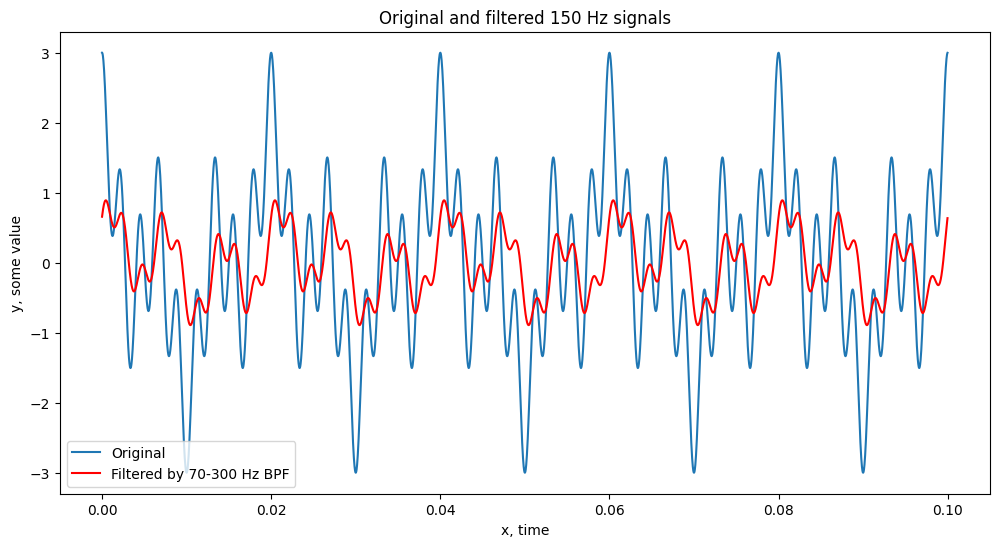

In [45]:
y_cos_from_band_pass = np.fft.ifft(band_pass_filtered_y_cos_fft)

plt.figure(figsize=(12, 6))
plt.plot(cos_args, y_cos)
plt.plot(cos_args, y_cos_from_band_pass, 'red')
plt.title("Original and filtered 150 Hz signals")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.legend(['Original', 'Filtered by 70-300 Hz BPF'])
plt.show()

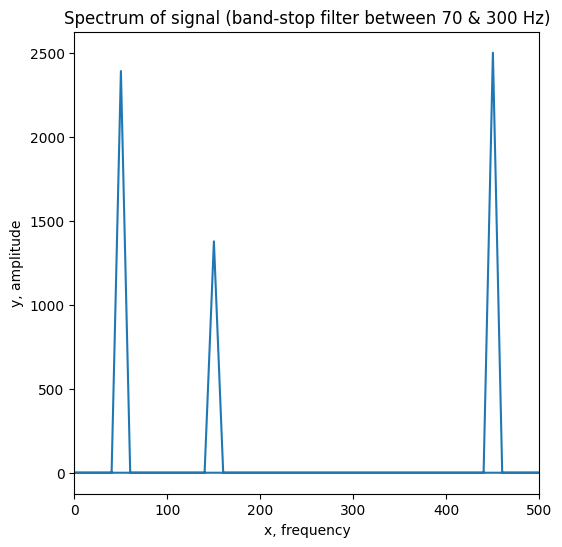

In [30]:
band_stop_filtered_y_cos_fft_base = low_filtered_y_cos_fft_base + high_filtered_y_cos_fft_base
band_stop_filtered_y_cos_fft = band_stop_filtered_y_cos_fft_base * y_cos_fft
band_stop_filtered_y_cos_fft /= max(band_stop_filtered_y_cos_fft) / max(y_cos_fft)

plt.figure(figsize=(6, 6))
plt.xlim([0, 500])
plt.plot(x_cos_fft, np.abs(band_stop_filtered_y_cos_fft))
plt.title("Spectrum of signal (band-stop filter between 70 & 300 Hz)")
plt.xlabel("x, frequency")
plt.ylabel("y, amplitude") 
plt.show()

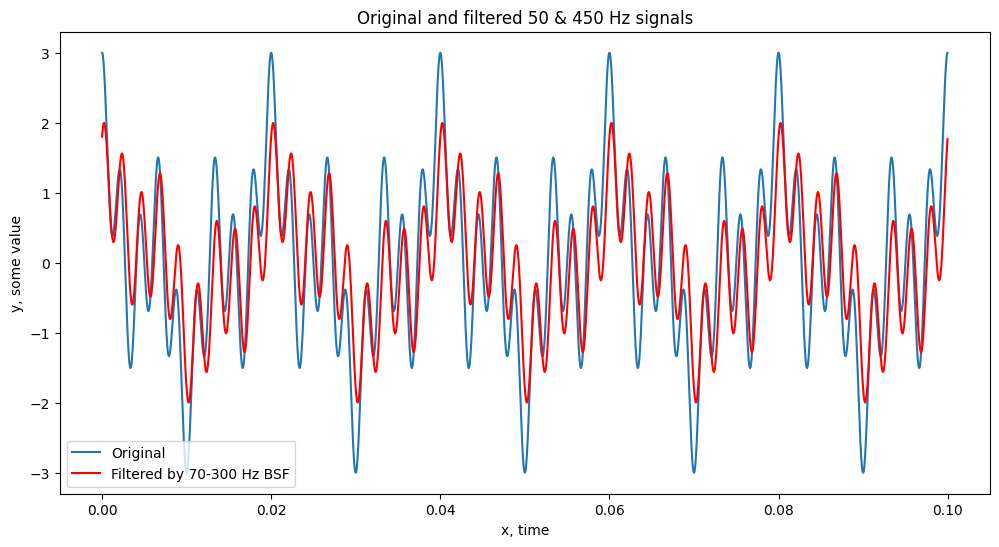

In [46]:
y_cos_from_band_stop = np.fft.ifft(band_stop_filtered_y_cos_fft)

plt.figure(figsize=(12, 6))
plt.plot(cos_args, y_cos)
plt.plot(cos_args, y_cos_from_band_stop, 'red')
plt.title("Original and filtered 50 & 450 Hz signals")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.legend(['Original', 'Filtered by 70-300 Hz BSF'])
plt.show()

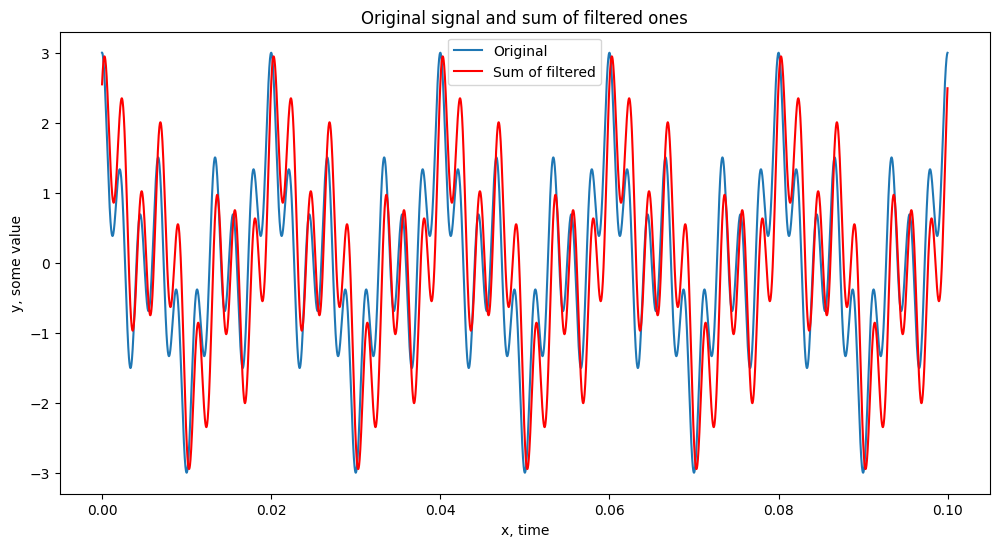

In [47]:
sum_cos = y_cos_from_low + y_cos_from_high + y_cos_from_band_pass

plt.figure(figsize=(12, 6))
plt.plot(cos_args, y_cos)
plt.plot(cos_args, sum_cos, 'red')
plt.title("Original signal and sum of filtered ones")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.legend(['Original', 'Sum of filtered'])
plt.show()

In [15]:
def n_butter_filter(w, n):
    return 1 / (1 + ((-1) ** n) * ((1j * w) ** (2 * n)))

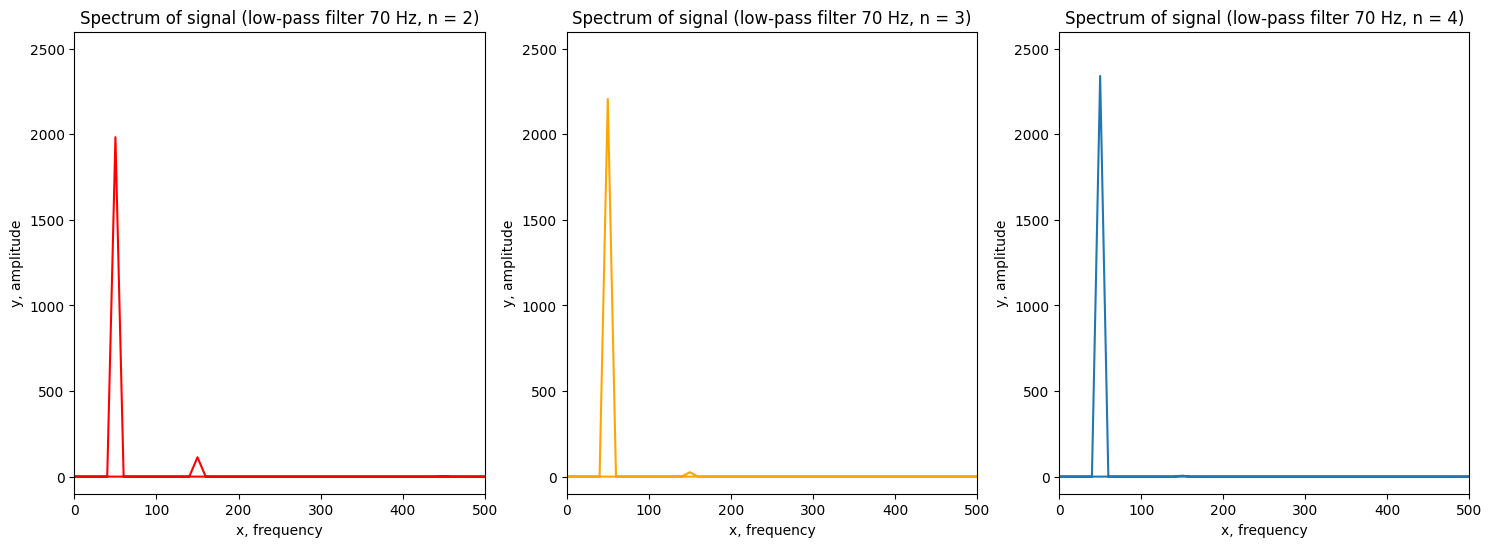

In [32]:
n_two_low_filtered_y_cos_fft_base = n_butter_filter(x_cos_fft / 70, 2)
n_two_low_filtered_y_cos_fft = n_two_low_filtered_y_cos_fft_base * y_cos_fft

n_three_low_filtered_y_cos_fft_base = n_butter_filter(x_cos_fft / 70, 3)
n_three_low_filtered_y_cos_fft = n_three_low_filtered_y_cos_fft_base * y_cos_fft

n_four_low_filtered_y_cos_fft_base = n_butter_filter(x_cos_fft / 70, 4)
n_four_low_filtered_y_cos_fft = n_four_low_filtered_y_cos_fft_base * y_cos_fft

plt.figure(figsize=(18, 6))

plt.subplot(131)
plt.xlim([0, 500])
plt.ylim([-100, 2600])
plt.plot(x_cos_fft, np.abs(n_two_low_filtered_y_cos_fft), 'red')
plt.title("Spectrum of signal (low-pass filter 70 Hz, n = 2)")
plt.xlabel("x, frequency")
plt.ylabel("y, amplitude") 

plt.subplot(132)
plt.xlim([0, 500])
plt.ylim([-100, 2600])
plt.plot(x_cos_fft, np.abs(n_three_low_filtered_y_cos_fft), 'orange')
plt.title("Spectrum of signal (low-pass filter 70 Hz, n = 3)")
plt.xlabel("x, frequency")
plt.ylabel("y, amplitude") 

plt.subplot(133)
plt.xlim([0, 500])
plt.ylim([-100, 2600])
plt.plot(x_cos_fft, np.abs(n_four_low_filtered_y_cos_fft))
plt.title("Spectrum of signal (low-pass filter 70 Hz, n = 4)")
plt.xlabel("x, frequency")
plt.ylabel("y, amplitude") 

plt.show()

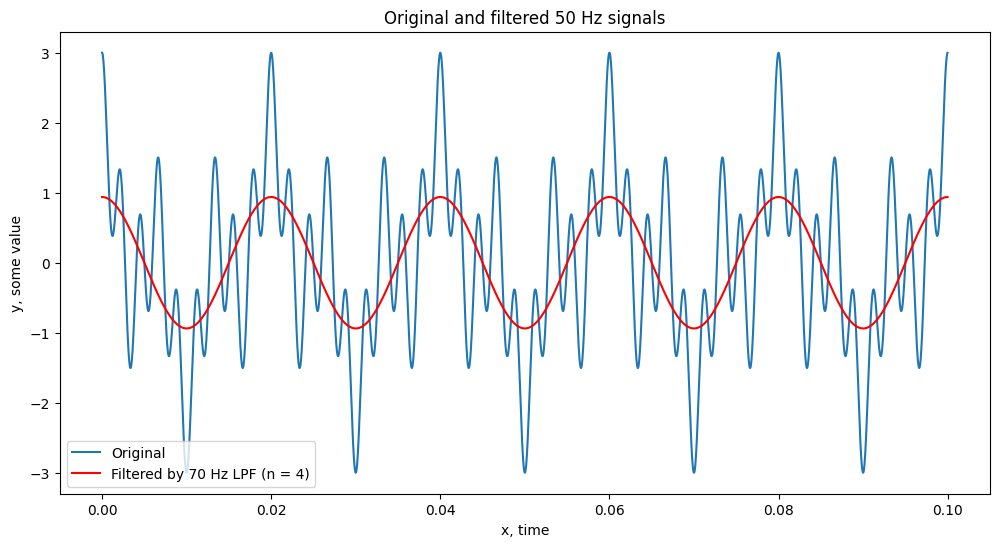

In [48]:
y_cos_from_n_four_low = np.fft.ifft(n_four_low_filtered_y_cos_fft)

plt.figure(figsize=(12, 6))
plt.plot(cos_args, y_cos)
plt.plot(cos_args, y_cos_from_n_four_low, 'red')
plt.title("Original and filtered 50 Hz signals")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.legend(['Original', 'Filtered by 70 Hz LPF (n = 4)'])
plt.show()

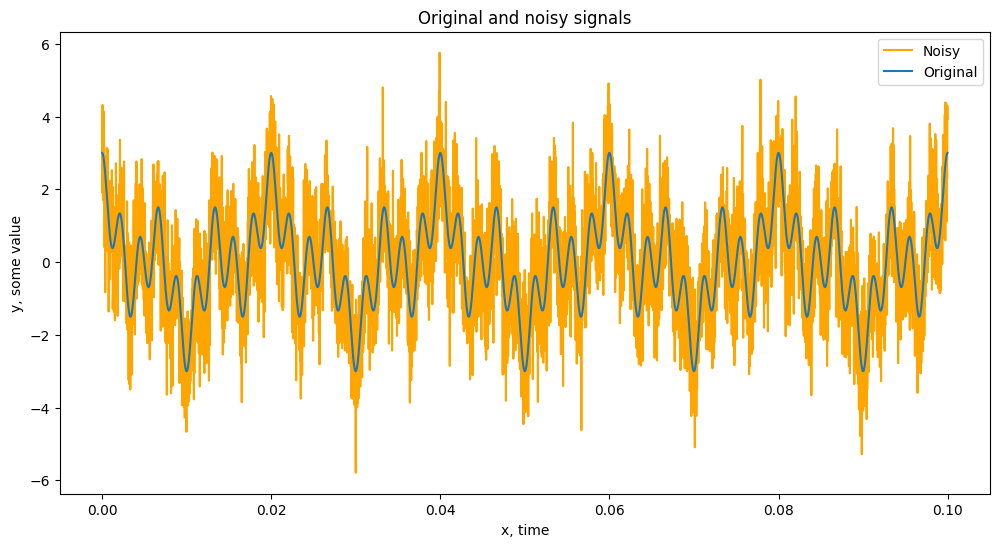

In [49]:
y_cos_noise = y_cos + np.random.normal(0, 1, 5000)

plt.figure(figsize=(12, 6))
plt.plot(cos_args, y_cos_noise, 'orange')
plt.plot(cos_args, y_cos)
plt.title("Original and noisy signals")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.legend(['Noisy', 'Original'])
plt.show()

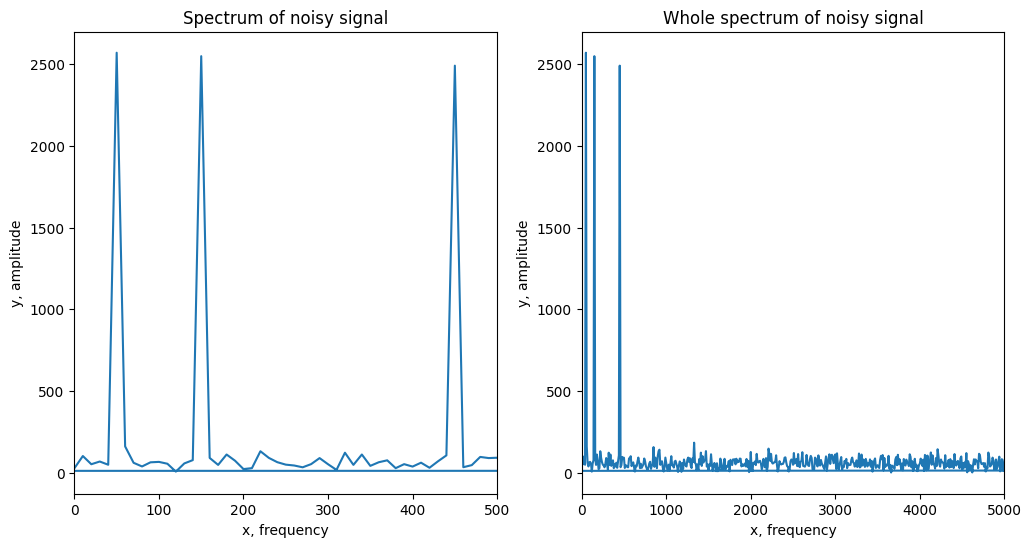

In [33]:
y_cos_noise_fft = np.fft.fft(y_cos_noise)

plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.plot(x_cos_fft, np.abs(y_cos_noise_fft))
plt.xlim([0, 500])
plt.title("Spectrum of noisy signal")
plt.xlabel("x, frequency")
plt.ylabel("y, amplitude") 

plt.subplot(122)
plt.plot(x_cos_fft, np.abs(y_cos_noise_fft))
plt.xlim([0, 5000])
plt.title("Whole spectrum of noisy signal")
plt.xlabel("x, frequency")
plt.ylabel("y, amplitude")

plt.show()

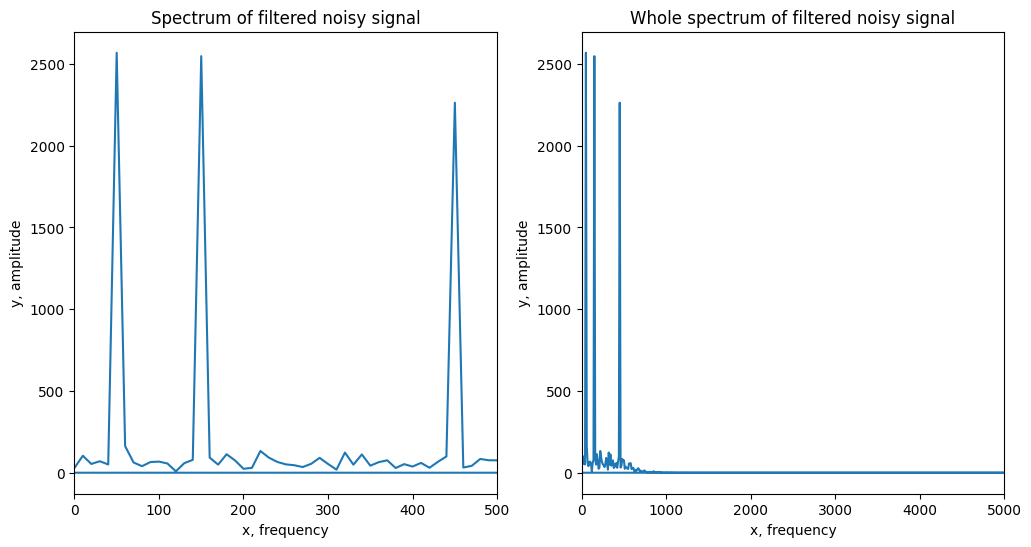

In [34]:
n_low_filtered_y_cos_noise_fft_base = n_butter_filter(x_cos_fft / 600, 4)
n_low_filtered_y_cos_noise_fft = n_low_filtered_y_cos_noise_fft_base * y_cos_noise_fft

plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.xlim([0, 500])
plt.plot(x_cos_fft, np.abs(n_low_filtered_y_cos_noise_fft))
plt.title("Spectrum of filtered noisy signal")
plt.xlabel("x, frequency")
plt.ylabel("y, amplitude")

plt.subplot(122)
plt.xlim([0, 5000])
plt.plot(x_cos_fft, np.abs(n_low_filtered_y_cos_noise_fft))
plt.title("Whole spectrum of filtered noisy signal")
plt.xlabel("x, frequency")
plt.ylabel("y, amplitude")

plt.show()

c:\Users\ZhukZzz\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\ZhukZzz\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


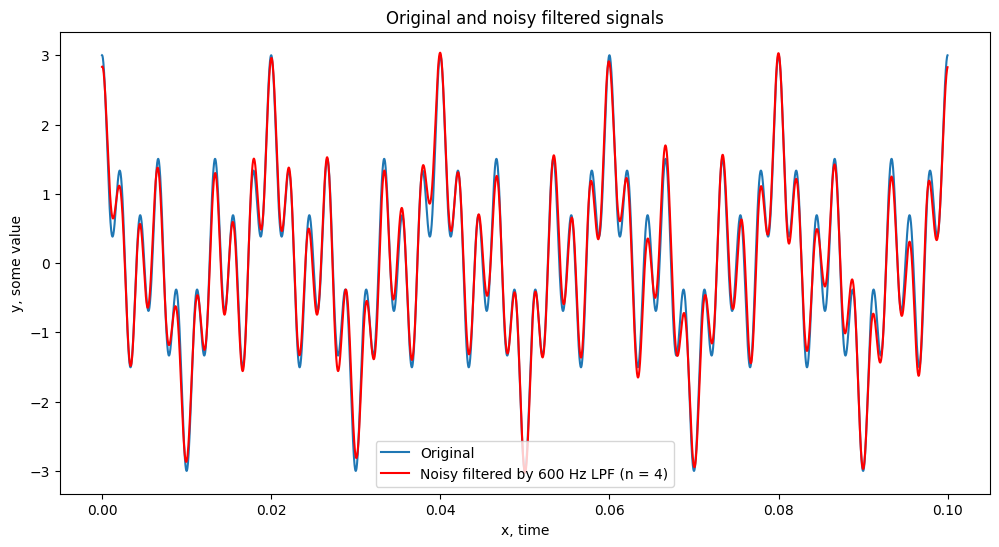

In [50]:
y_cos_from_n_low_noise = np.fft.ifft(n_low_filtered_y_cos_noise_fft)

plt.figure(figsize=(12, 6))
plt.plot(cos_args, y_cos)
plt.plot(cos_args, y_cos_from_n_low_noise, 'red')
plt.title("Original and noisy filtered signals")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.legend(['Original', 'Noisy filtered by 600 Hz LPF (n = 4)'])
plt.show()